# **1.0 BUSINESS UNDERSTANDING**

## **1.1 Overview**

Financial inclusion,access to financial services as well as financial literacy is crucial for economic development as well as poverty eradication. Affordable and accessible financial products and services-such as savings,transactions,credit insurance-is thus an essential tool that helps individuals pull themselves from poverty, manage risk, invest in businesses and build wealth ensuring financial security and freedom. 

According to **The World Bank**, financial inclusion is a catalyst to solving **seven(7)** of the **seventeen(17)** Sustainable Development Goals(SDGs). This project is thus looking to solve the problem of access to banking services in East Africa (Kenya,Rwanda, Tanzania, Uganda)

## **1.2 Objective**

The objective of this project is to predict whether an **individual has a bank account to their name** using various demographic and socio-economic features in the data set.

This classification problem, will aim to assist various financial institutions, policy makers or even international entities i.e IMF in identifying unbanked poppulations to promote financial inclusion

## **1.3 Key Business Questions**

1.Who does not have a bank account?

2.What are the factors that influence ownership of a bank account?

3.How best can the model support financial inclusion?

## **1.4 Success Criteria**

1.**Accuracy of the model**- How good is the model in predicting who may or may not have a bank account

2.**Actionable insights**- Providing quality and actionable insights on factors affecting bank account ownership

3.**Business Impact**-Assistance in targeting appropriate audiences for financial inclusion programs.

# **2.0 DATA UNDERSTANDING** 

## **2.1 Overview**

The dataset contains 23,524 records from four East African countries: Kenya, Uganda, Tanzania, and Rwanda, and aims to predict whether an individual has a bank account (bank_account-Yes = 1, No = 0).

## **2.2 Key Features and Data Types**

The data set we will be using has a total of 13 features, 12 independent and 1(Bank account) target.Below is a summary of each feature description as well as the data type:

1.**country**: The country in which the respondent resides (Kenya, Uganda, Tanzania, Rwanda) (Categorical)

2.**year**: Year of data collection (numerical)

3.**uniqueid**: A unique identifier for each respondent (categorical)

4.**bank_account**: The target variable (Yes/No) (Binary)

5.**location_type**: Whether the respondent resides in an urban or rural area (Binary)

6.**cellphone_access**: Whether the respondent has access to a cellphone (Binary)

7.**household_size**: Number of people in the household (Numerical)

8.**age_of_respondent**: Age of the respondent (Numerical)

9.**gender_of_respondent**: Gender of the respondent (Binary)

10.**relationship_with_head**: The relationship of the respondent to the head of the household (Categorical)

11.**marital_status**: Marital status of the respondent (Categorical)

12.**education_level**: Education level of the respondent (Categorical)

13.**job_type**: Type of job held by the respondent (Categorical)

## 2.3 Data Distribution

The target variable (bank_account) could potentially be imbalanced, especially since access to banking services may be limited in rural and less developed regions. A detailed breakdown of the bank_account variable will be necessary to check for imbalance, which can impact model performance.

If imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) or class weights in the model may be required.

# 3.0 DATA CLEANING 

This is an essential part of the Data Science procedure as the quality of the model is heavily dependent on the quality of the data available

In [1010]:
#importing the necessary libraries

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns



In [1011]:
#Loading the data set
df=pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Phase 3 Project\Train.csv")


#make a copy
df_copy=df.copy()
#Viewing the first five rows
df_copy.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [1012]:
#Looking at the data summary 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [1013]:
#Checking for null values
df_copy.isnull().sum()


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [1014]:
#Checking for any duplicates
df_copy.duplicated().sum()

0

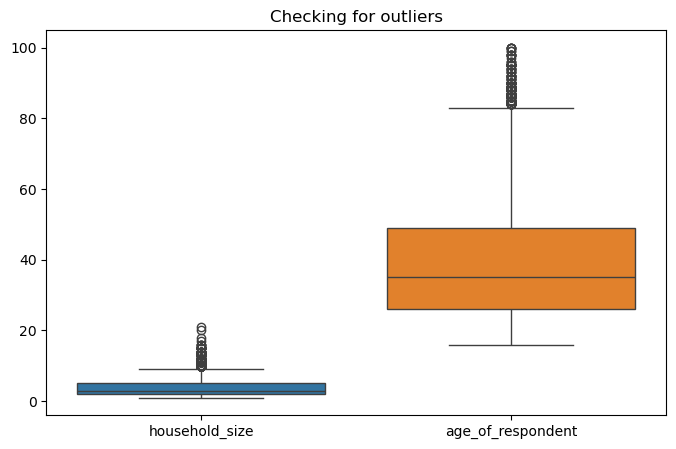

In [1015]:
#checking for outliers

plt.figure(figsize=(8,5))
sns.boxplot(df_copy[["household_size","age_of_respondent"]])
plt.title("Checking for outliers")
plt.show()

In [1016]:
#Eliminate outliers using IQR method

#Calculate Q1 & Q3

Q1=df_copy["age_of_respondent"].quantile(0.25)
Q3=df_copy["age_of_respondent"].quantile(0.75)

#Calculate the IQR

IQR=Q3-Q1

#Calculate the lower and upper bounds

lower_bound=Q1-IQR*1.5
upper_bound=Q3+IQR*1.5

#Eliminate outliers
df2=df_copy[(df_copy["age_of_respondent"]>=lower_bound) & (df_copy["age_of_respondent"]<=upper_bound)]

#Check new shape
df2.shape

(23283, 13)

## 3.1 FEATURE ENGINEERING

This is an essential part of in improving performance and predictive power of machine learning models.It mainly involves two options i.e Creating new features or modifying existing ones. This will help the model better understand underlying patterns in the data

### 3.1.1 Creating age_groups and house_hold_groups

In [1017]:
#Defining the groups desired
age_bins=[16,25,45,65,100]
age_labels=["Young Adult","Adult","Middle Age","Old"]

#Creating a new column age_group
df2["age_group"]=pd.cut(df2["age_of_respondent"],bins=age_bins,labels=age_labels,right=True)

df2.head(5)

C:\Users\User\AppData\Local\Temp\ipykernel_13208\2447590050.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["age_group"]=pd.cut(df2["age_of_respondent"],bins=age_bins,labels=age_labels,right=True)


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Young Adult
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Old
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Adult
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Adult
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Adult


In [1018]:
#Defining the groups desired
household_bins=[0,5,10,15,100]
household_labels=["Small","Average","Large","Very Large"]

#Creating a new column household_group
df2["household_group"]=pd.cut(df2["household_size"],bins=household_bins,labels=household_labels,right=True)



C:\Users\User\AppData\Local\Temp\ipykernel_13208\1382886062.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["household_group"]=pd.cut(df2["household_size"],bins=household_bins,labels=household_labels,right=True)


## 3.1.2 Creating Interaction Features

This is a process involving combining two or more features in the data set to capture their effect on the target variable

In [1019]:
#Categorical interactions
df2["job_edu_inter"]=df2["job_type"]+"_"+df2["education_level"]
df2["job_cell_inter"]=df2["job_type"]+"_"+df2["cellphone_access"]
df2["edu_cell_inter"]=df2["education_level"]+"_"+df2["cellphone_access"]
df2["house_location_inter"]=df2["household_size"].astype(str)+"_"+df2["location_type"]
df2["job_household_inter"]=df2["job_type"]+"_"+df2["household_size"].astype(str)
df2["edu_house_inter"]=df2["education_level"]+"_"+df2["household_size"].astype(str)

#Numeric interactions
df2["age_household_inter"]=df2["age_of_respondent"]*df2["household_size"]
df2["age_cell_inter"]=df2["age_of_respondent"]*(df["cellphone_access"]=="yes").astype(int)


pd.set_option("display.max_columns",1000)
df2.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13208\3383512039.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["job_edu_inter"]=df2["job_type"]+"_"+df2["education_level"]
C:\Users\User\AppData\Local\Temp\ipykernel_13208\3383512039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["job_cell_inter"]=df2["job_type"]+"_"+df2["cellphone_access"]
C:\Users\User\AppData\Local\Temp\ipykernel_13208\3383512039.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group,household_group,job_edu_inter,job_cell_inter,edu_cell_inter,house_location_inter,job_household_inter,edu_house_inter,age_household_inter,age_cell_inter
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,Young Adult,Small,Self employed_Secondary education,Self employed_Yes,Secondary education_Yes,3_Rural,Self employed_3,Secondary education_3,72,0.0
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,Old,Small,Government Dependent_No formal education,Government Dependent_No,No formal education_No,5_Rural,Government Dependent_5,No formal education_5,350,0.0
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,Adult,Small,Self employed_Vocational/Specialised training,Self employed_Yes,Vocational/Specialised training_Yes,5_Urban,Self employed_5,Vocational/Specialised training_5,130,0.0
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,Adult,Small,Formally employed Private_Primary education,Formally employed Private_Yes,Primary education_Yes,5_Rural,Formally employed Private_5,Primary education_5,170,0.0
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,Adult,Average,Informally employed_Primary education,Informally employed_No,Primary education_No,8_Urban,Informally employed_8,Primary education_8,208,0.0


In [1020]:
df2.isnull().sum()
df2.shape

(23283, 23)

In [1021]:
#Dropping null values
df2=df2.dropna()

df2.isnull().sum()

df2.shape

(22821, 23)

# 4.EXPLORATORY DATA ANALYSIS(EDA)

Exploratory Data analysis is fundamental to the Data Science process as it visualizes the data, uncover patterns thus providing insights 

## 4.1.1 Class Distribution of Target Variable

The below graph will show that the target variable is widely imbalanced. This will skew the model results thus we will have to employ class balancing techniques such as SMOTE

C:\Users\User\AppData\Local\Temp\ipykernel_13208\277013544.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bank_account",data=df2,palette="coolwarm")


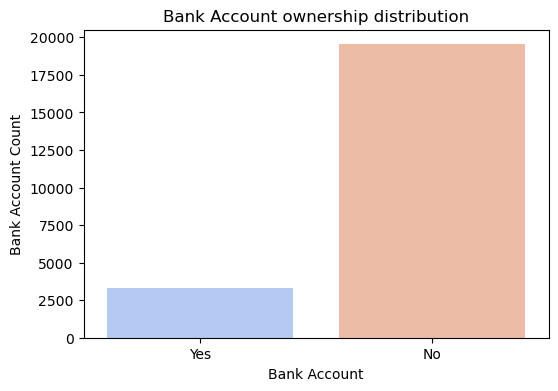

In [1022]:
plt.figure(figsize=(6,4))
sns.countplot(x="bank_account",data=df2,palette="coolwarm")
plt.title("Bank Account ownership distribution")
plt.xlabel("Bank Account")
plt.ylabel("Bank Account Count")
plt.show()

## 4.1.2 Checking Distribution of Numerical Features

The numerical features are not normally distributed,they are left skewed, thus we will have to do logarithmic transformation to try and normalize them

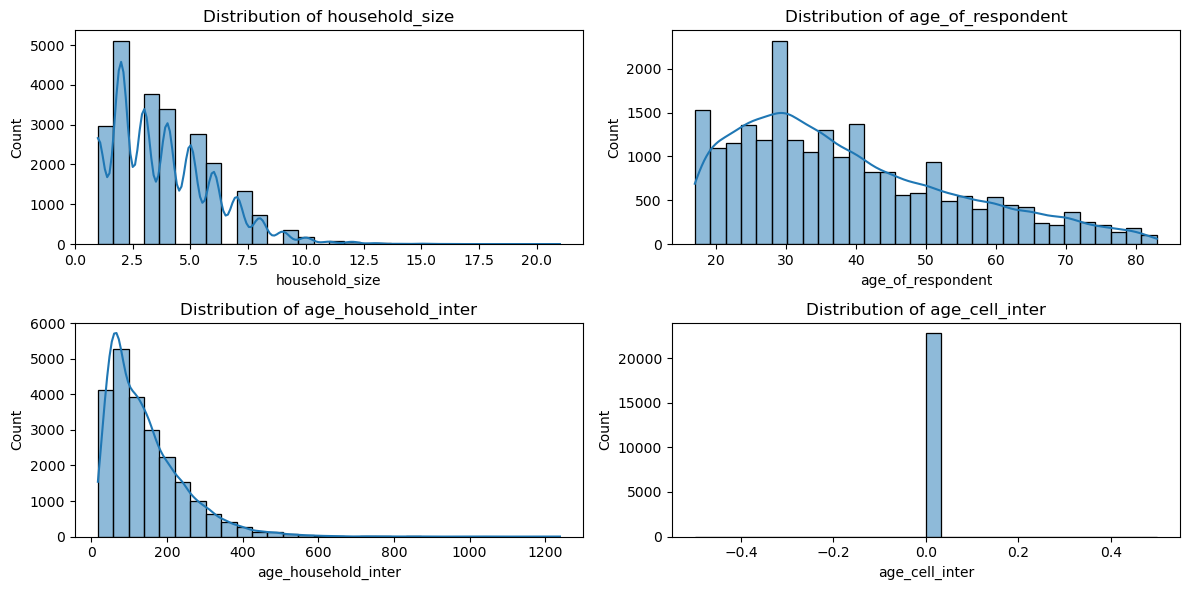

In [1023]:
num_features=["household_size","age_of_respondent","age_household_inter","age_cell_inter"]

plt.figure(figsize=(12,6))
for feature,column in enumerate(num_features):
    plt.subplot(2,2,feature + 1)
    sns.histplot(df2[column],kde=True,bins=30)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

## 4.2.1 Bank Account vs Country

From the plot it shows that Kenya had the most respondents with bank accounts while Rwanda had the most respondents without bank accounts

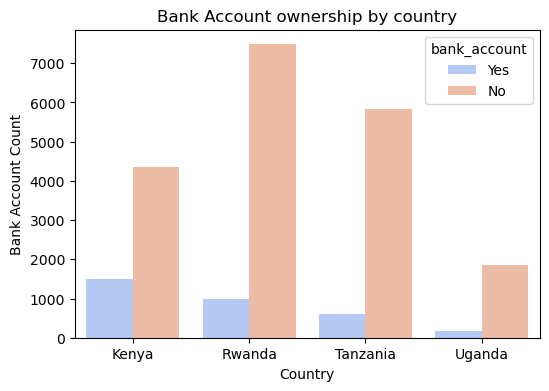

In [1024]:
plt.figure(figsize=(6,4))
sns.countplot(x="country",hue="bank_account",data=df2,palette="coolwarm")
plt.title("Bank Account ownership by country")
plt.xlabel("Country")
plt.ylabel("Bank Account Count")
plt.show()

## 4.2.2 Bank Account vs Location Type

Majority of Respondents from Rural background had no bank accounts but stunningly around the same number of respondents from Rural and Urban locations had accounts

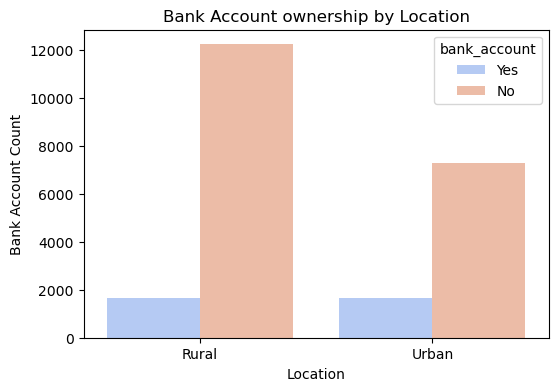

In [1025]:
plt.figure(figsize=(6,4))
sns.countplot(x="location_type",hue="bank_account",data=df2,palette="coolwarm")
plt.title("Bank Account ownership by Location")
plt.xlabel("Location")
plt.ylabel("Bank Account Count")
plt.show()

## 4.2.3 Bank Account by Cellphone access

Unsurprisingly the majority of bank account owners had cellphones



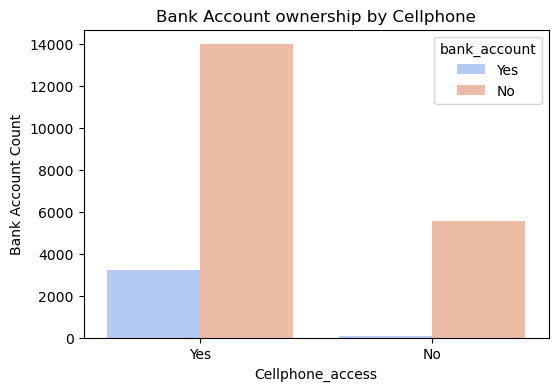

In [1026]:
plt.figure(figsize=(6,4))
sns.countplot(x="cellphone_access",hue="bank_account",data=df2,palette="coolwarm")
plt.title("Bank Account ownership by Cellphone")
plt.xlabel("Cellphone_access")
plt.ylabel("Bank Account Count")
plt.show()

## 4.2.4 Bank Account by Age group
 
Adults(26-45) accounted to the majority of bank account ownership

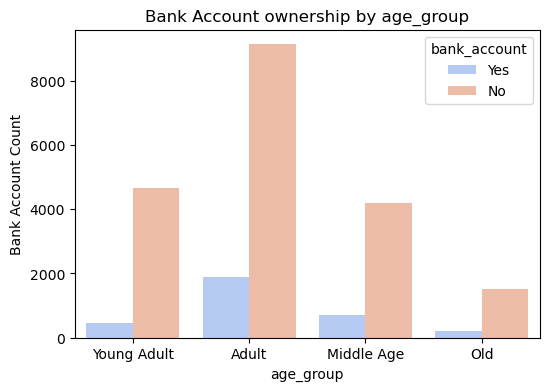

In [1027]:
plt.figure(figsize=(6,4))
sns.countplot(x="age_group",hue="bank_account",data=df2,palette="coolwarm")
plt.title("Bank Account ownership by age_group")
plt.xlabel("age_group")
plt.ylabel("Bank Account Count")
plt.show()

## 4.3.1 Correlation matrix 

Only two of the numerical features are highly correlated, with a correlation of 77%

1.household_size & age_household_inter


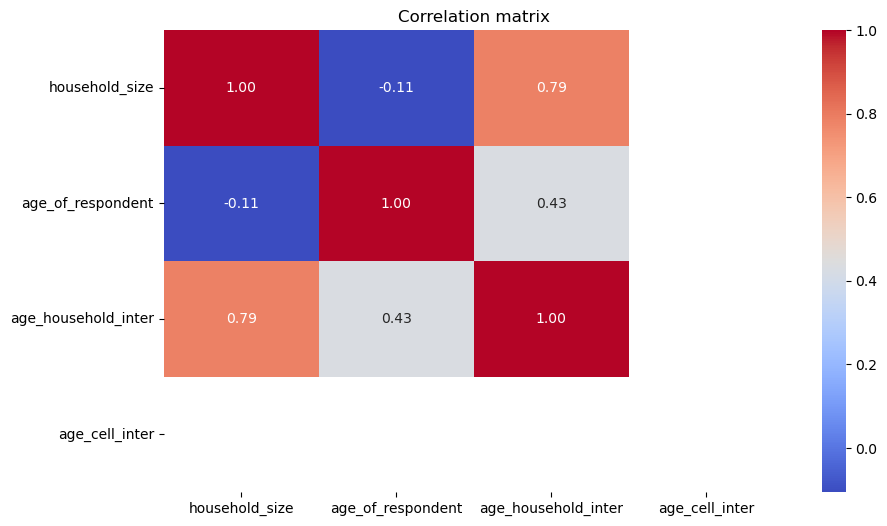

In [1028]:
num_features2= df2.select_dtypes(include=["int64","float64"]).columns

correlation_matrix=df2[num_features].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation matrix")
plt.show()

# 4. MODELING

Modeling is essentially the predictive part of the Data Science. In this section, I will look to build a classification model that appropriately predicts whether someone has a bank account and I will tune it to further improve its predictive powers

## 4.1 Preprocessing

This is the first step of modeling where I further prepare the data needed using methods such as Scaling, Logarithmic transformation, Splitting the data into training and testing as well as Label Encoding/OneHotEncoding

In [1029]:
#import necessary libraries
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [1030]:
df2.shape

(22821, 23)

In [1031]:
#Defining categorical and numerical columns
cat=df2.select_dtypes(include=["object","category"]).columns
num=df2.select_dtypes(include=["int64","float64"]).columns

#Exclude target variable & unnecessary 
cat=cat.drop(["bank_account","uniqueid"])
df2=df2.drop(["uniqueid","year","country","age_cell_inter"],axis=1)

In [1032]:
#Label encode the binary columns
le=LabelEncoder()
df2["bank_account"]=le.fit_transform(df2["bank_account"])
df2["location_type"]=le.fit_transform(df2["location_type"])
df2["cellphone_access"]=le.fit_transform(df2["cellphone_access"])
df2["gender_of_respondent"]=le.fit_transform(df2["gender_of_respondent"])
df2.head(3)

df2.shape

(22821, 19)

In [1033]:

# Initialize the OneHotEncoder 
ohe = OneHotEncoder(drop="first", sparse_output=False)

# List of columns to encode
columns_to_encode = [
    "relationship_with_head", "marital_status", "education_level", "job_type",
    "age_group", "household_group", "job_edu_inter", "job_cell_inter", 
    "edu_cell_inter", "house_location_inter", "job_household_inter", "edu_house_inter"
]

# Reset the index of the original DataFrame prevent misalignment during concating
df2 = df2.reset_index(drop=True)

#Apply OneHotEncoder to the selected columns
encoded_values = ohe.fit_transform(df2[columns_to_encode])

# Get the feature names after encoding
encoded_column_names = ohe.get_feature_names_out(columns_to_encode)

#Create a new DataFrame with the encoded columns and their respective names
encoded_df = pd.DataFrame(encoded_values, columns=encoded_column_names)

#Concatenate the encoded columns with the original DataFrame, ensuring that index alignment is preserved
df2 = pd.concat([df2, encoded_df], axis=1)

#Drop the original columns to avoid duplication
df2.drop(columns=columns_to_encode, inplace=True)

# Verify that no extra rows have been created
print(f"Shape of the DataFrame before OHE: {df2.shape}")
print(f"Shape of the DataFrame after OHE: {encoded_df.shape}")





Shape of the DataFrame before OHE: (22821, 383)
Shape of the DataFrame after OHE: (22821, 376)


In [1034]:

X = df2.drop(columns=["bank_account"])  # Features
y = df2["bank_account"]  # Target variable

#Apply scaling only to numerical features
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = X.select_dtypes(include=["float64", "int64"]).columns

# Apply scaling to numerical columns only
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)




## 4.2 Modeling

In this step I will build models and tune them to try 

In [1035]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score


In [1036]:
#Build &Train logistic Regression model

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train_resampled,y_train_resampled)

#Making predictions and evaluating the model
log_reg_pred=log_reg.predict(X_test)
print(classification_report(y_test,log_reg_pred))

              precision    recall  f1-score   support

           0       0.94      0.80      0.87      5850
           1       0.37      0.69      0.48       997

    accuracy                           0.79      6847
   macro avg       0.66      0.75      0.67      6847
weighted avg       0.86      0.79      0.81      6847



In [1037]:
#Build and Train Decision Tree
dct=DecisionTreeClassifier()
dct.fit(X_train_resampled,y_train_resampled)

#Making predictions and evaluating the model
dct_pred=dct.predict(X_test)
print(classification_report(y_test,dct_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5850
           1       0.39      0.38      0.39       997

    accuracy                           0.82      6847
   macro avg       0.64      0.64      0.64      6847
weighted avg       0.82      0.82      0.82      6847



In [1038]:
#Build and Train XGBoost
xgb_c=XGBClassifier()
xgb_c.fit(X_train_resampled,y_train_resampled)

#Making predictions and evaluating the model
xgb_pred=xgb_c.predict(X_test)
print(classification_report(y_test,xgb_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      5850
           1       0.56      0.43      0.49       997

    accuracy                           0.87      6847
   macro avg       0.73      0.69      0.71      6847
weighted avg       0.86      0.87      0.86      6847



In [1039]:
#Getting most important features for decision tree
dct_feature_importance=pd.DataFrame({"Feature":X_train_resampled.columns,"Importance":dct.feature_importances_})

dct_feature_importance=dct_feature_importance.sort_values(by="Importance",ascending=False)

print(dct_feature_importance.head(15))

                                      Feature  Importance
1                            cellphone_access    0.122128
6    relationship_with_head_Head of Household    0.113716
3                           age_of_respondent    0.108653
5                         age_household_inter    0.091861
16          education_level_Primary education    0.066243
111    edu_cell_inter_No formal education_Yes    0.061764
12     marital_status_Married/Living together    0.061224
29                       age_group_Middle Age    0.040263
115      edu_cell_inter_Primary education_Yes    0.023384
31                      age_group_Young Adult    0.023289
18         education_level_Tertiary education    0.018286
117    edu_cell_inter_Secondary education_Yes    0.016269
4                        gender_of_respondent    0.015039
14                     marital_status_Widowed    0.013946
13        marital_status_Single/Never Married    0.013462


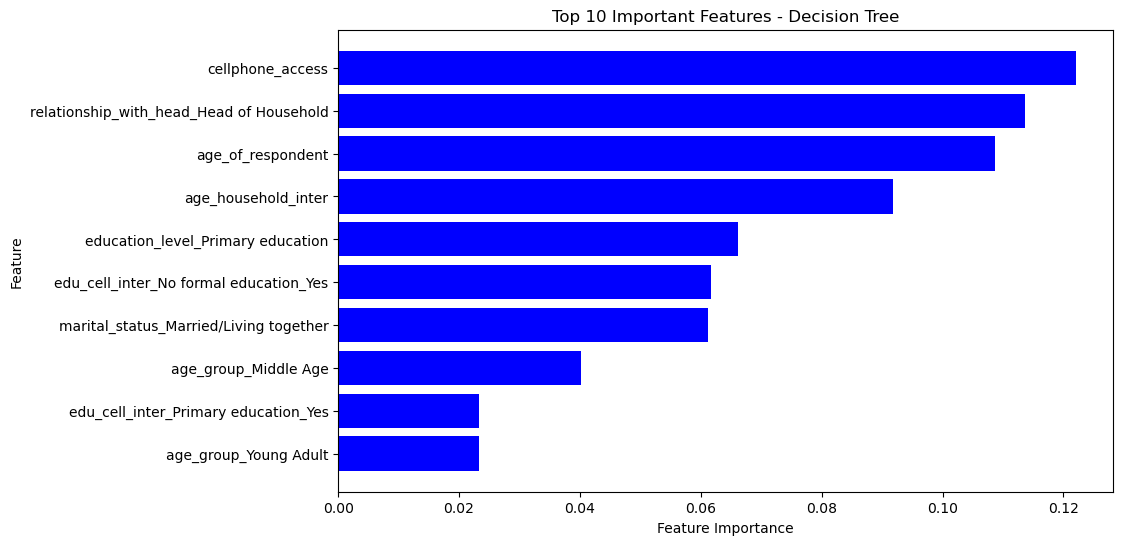

In [1040]:
#Plot feature importance
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(dct_feature_importance['Feature'][:10], dct_feature_importance['Importance'][:10], color='blue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 10 Important Features - Decision Tree")
plt.gca().invert_yaxis()
plt.show()

In [1041]:
# Selecting the top 10 features
top_10_features = [
    "cellphone_access", "relationship_with_head_Head of Household",
    "age_of_respondent", "age_household_inter", "education_level_Primary education",
    "edu_cell_inter_No formal education_Yes", "marital_status_Married/Living together",
    "age_group_Middle Age", "age_group_Young Adult", "education_level_Tertiary education"
]

# Subset dataset to include only top 10 features
X_train_top10 = X_train_resampled[top_10_features]
X_test_top10 = X_test[top_10_features]

# Initialize and train Decision Tree model
dct_top10 = DecisionTreeClassifier(random_state=42)
dct_top10.fit(X_train_top10, y_train_resampled)

# Make predictions
dct_top10_pred = dct_top10.predict(X_test_top10)

# Evaluate performance
print(classification_report(y_test, dct_top10_pred))


              precision    recall  f1-score   support

           0       0.88      0.94      0.91      5850
           1       0.43      0.28      0.33       997

    accuracy                           0.84      6847
   macro avg       0.65      0.61      0.62      6847
weighted avg       0.82      0.84      0.83      6847



In [1042]:

#Reapply SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_top10, y_train_resampled)

# Step 2: Define Hyperparameter Grid
param_grid = {
    'max_depth': [5],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 5],  
    'criterion': ['gini', 'entropy']  
}

# Step 3: Use GridSearchCV for Hyperparameter Tuning
grid_search = GridSearchCV(dct, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 4: Train Decision Tree with Best Parameters
best_params = grid_search.best_params_
best_dct = DecisionTreeClassifier(**best_params, random_state=42)
best_dct.fit(X_train_resampled, y_train_resampled)

# Step 5: Evaluate Performance
y_pred = best_dct.predict(X_test_top10)
print("Best Parameters:", best_params)
print(classification_report(y_test, y_pred))



Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      5850
           1       0.49      0.45      0.47       997

    accuracy                           0.85      6847
   macro avg       0.70      0.69      0.69      6847
weighted avg       0.85      0.85      0.85      6847

